# Hábitos dos alunos x Desempenho Acadêmico

Este conjunto de dados simula os hábitos diários de 1.000 alunos — do tempo de estudo à saúde mental — e os compara com as notas de provas finais.
Atributos:



🧑‍🎓 Informações do Estudante student_id, Age, gender, parental_education_level

 📚 Performance Acadêmica: attendance_percentage, study_hours_per_day

 🧠 Estilo de Vida: sleep_hours, exercise_frequency, mental_health_rating

 📱 Hábitos digitais: social_media_hours, netflix_hours, internet_quality

 🍽️ Saúde Alimentar: diet_quality

 💼 Extracurricular & Trabalho: part_time_job, extracurricular_participation

 ▶️ Variável Alvo (Target): exam_score

###### Fonte do Dataset: Kaggle https://www.kaggle.com/datasets/jayaantanaath/student-habits-vs-academic-performance/data

## Importando as Bibliotecas

In [ ]:
#Manipulação de dados
import pandas as pd
import numpy as np

#Bibliotecas de visualização

#Desenvolvimento de Aplicações Web
#import streamlit as st

#Manipulação de Datas e Imagens
import datetime
from PIL import Image

#Gráficos Interativos
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

#Gráficos estátivos
import matplotlib.pyplot as plt
import seaborn as sns

#Output mais limpo
import warnings
warnings.filterwarnings("ignore")

## Carregando Dataset

In [ ]:
df_student = pd.read_csv("student_habits.csv")

#Verficando dimensões do dataframe
df_student.shape

(1000, 16)

In [ ]:
#Informações do DataFrame
df_student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob


Características numéricas:  age, study_hours_per_day, social_media_hours, netflix_hours, attendance_percentage, sleep_hours, exercise_frequency and mental_health_rating and exam_score.

Características categóricas: gender, part_time_job, diet_quality, parental_education_level, internet_quality and extracurricular_participation.

Obs: A coluna "student_id" é apenas um número para identificar este aluno neste conjunto de dados. Portanto, esta coluna não faz parte das informações com as quais devemos nos preocupar.

Consistência e integridade dos dados

Os tipos de dados são apropriados: características numéricas são inteiros e flutuantes, e características categóricas são objetos (strings).


In [ ]:
#Primeiras 10 linhas
df_student.head(10)

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4
5,S1005,24,Male,7.2,1.3,0.0,No,82.9,7.4,Fair,1,Master,Average,4,No,100.0
6,S1006,21,Female,5.6,1.5,1.4,Yes,85.8,6.5,Good,2,Master,Poor,4,No,89.8
7,S1007,21,Female,4.3,1.0,2.0,Yes,77.7,4.6,Fair,0,Bachelor,Average,8,No,72.6
8,S1008,23,Female,4.4,2.2,1.7,No,100.0,7.1,Good,3,Bachelor,Good,1,No,78.9
9,S1009,18,Female,4.8,3.1,1.3,No,95.4,7.5,Good,5,Bachelor,Good,10,Yes,100.0


## Tratamento dos Dados

In [ ]:
#Valores faltantes
pd.isna(df_student).sum()

,0
student_id,0
age,0
gender,0
study_hours_per_day,0
social_media_hours,0
netflix_hours,0
part_time_job,0
attendance_percentage,0
sleep_hours,0
diet_quality,0


Somente parental_education_level possui valor ausente (91/1000 faltantes).

Como os ID's não agregam valor para a nossa análise, optamos por removê-los definitivamente. Isso reduz dimensionalidade desnecessária.

In [ ]:
#Removendo coluna de ID
df_student.drop("student_id", axis=1, inplace=True)

O código a seguir identifica as colunas que contêm dados categóricos (como gênero, qualidade da dieta, nível de educação dos pais) e converte seu tipo de dados de "object" para "category". Esta conversão é uma boa prática em análise de dados pois otimiza o uso de memória - ao invés de armazenar cada texto repetidamente, o pandas cria códigos numéricos internos para cada categoria única.

In [ ]:
#Conversão de dados categóricos
cat_features = ["gender",  "part_time_job",  "diet_quality",  "parental_education_level",  "internet_quality",  "extracurricular_participation"]

for feature in cat_features:
    if feature in df_student.columns:
        df_student[feature] = df_student[feature].astype("category")

df_student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   age                            1000 non-null   int64   
 1   gender                         1000 non-null   category
 2   study_hours_per_day            1000 non-null   float64 
 3   social_media_hours             1000 non-null   float64 
 4   netflix_hours                  1000 non-null   float64 
 5   part_time_job                  1000 non-null   category
 6   attendance_percentage          1000 non-null   float64 
 7   sleep_hours                    1000 non-null   float64 
 8   diet_quality                   1000 non-null   category
 9   exercise_frequency             1000 non-null   int64   
 10  parental_education_level       909 non-null    category
 11  internet_quality               1000 non-null   category
 12  mental_health_rating           1000

Estatísticas das Variáveis Numéricas

In [ ]:
df_student.describe()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,1000.0000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.4980,3.55010,2.505500,1.819700,84.131700,6.470100,3.042000,5.438000,69.601500
std,2.3081,1.46889,1.172422,1.075118,9.399246,1.226377,2.025423,2.847501,16.888564
min,17.0000,0.00000,0.000000,0.000000,56.000000,3.200000,0.000000,1.000000,18.400000
25%,18.7500,2.60000,1.700000,1.000000,78.000000,5.600000,1.000000,3.000000,58.475000
50%,20.0000,3.50000,2.500000,1.800000,84.400000,6.500000,3.000000,5.000000,70.500000
75%,23.0000,4.50000,3.300000,2.525000,91.025000,7.300000,5.000000,8.000000,81.325000
max,24.0000,8.30000,7.200000,5.400000,100.000000,10.000000,6.000000,10.000000,100.000000


In [ ]:
#print("Estatísticas com Estilo Visual:")
#cm = sns.light_palette("blue", as_cmap=True)
#display(df_student.describe().T.style.background_gradient(cmap=cm))

Estatísticas Apenas das Variáveis Categóricas

In [ ]:
df_student.describe(include=["category", "object"])

,gender,part_time_job,diet_quality,parental_education_level,internet_quality,extracurricular_participation
count,1000,1000,1000,909,1000,1000
unique,3,2,3,3,3,2
top,Female,No,Fair,High School,Good,No
freq,481,785,437,392,447,682


Estatísticas mostradas:

count: Número total de valores não-nulos

unique: Quantidade de valores únicos/distintos

top: Valor mais frequente (moda)

freq: Frequência do valor mais comum

<span style="color: pink;">Insights sobre Características Categóricas</span>

- **part_time_job**: A maioria dos alunos não possui um emprego de meio período (785 de 1.000).

- **diet_quality**: A qualidade da dieta mais comum é Regular (437), o que pode ser um fator relevante ao analisar o desempenho acadêmico ou a saúde.

- **internet_quality**: A maioria dos alunos avalia sua conexão de internet como Boa (447).

- **extracurricular_participation**: A maioria dos alunos não participa de atividades extracurriculares (682).

In [ ]:
# Substitua todos os valores ausentes (NaN) na coluna parental_education_level de df_student pelo valor mais comum (moda) dessa coluna.
#df_student["parental_education_level"] = df_student["parental_education_level"].fillna(df_student["parental_education_level"].mode()[0])

In [ ]:
#def missing_values_report(df = df_student):
#    missing_count = df.isnull().sum().sum()
#    rows = len(df)
#
#    print("=" * 80)
#    print(f" Análise de Valores Ausentes")
#    print("=" * 80)
#
#    if missing_count == 0:
#        print(f"✅ Nenhum valor ausente detectado em {rows:,} rows")
#    else:
#        print(f"⚠️  {missing_count} valores ausentes encontrados em {rows:,} rows")
#missing_values_report()

Verificando se existem Dados Duplicados

In [ ]:
sum(df_student.duplicated())

0

Nenhum dado duplicado foi encontrado no conjunto de dados, confirmando a exclusividade e a integridade de 0 duplicatas em 1.000 linhas.

## Análise Exploratória

### Variáveis Categóricas

gender, part_time_job, diet_quality, parental_education_level, internet_quality and extracurricular_participation.

In [ ]:
#Gênero
px.pie(names=df_student.gender.value_counts().index, values=df_student.gender.value_counts().values).update_layout(
    title='Contagem de Estudantes por Gênero',
    width=700,
    height=500
).show()

In [ ]:
#Trabalho de meio período
px.pie(names=df_student.part_time_job.value_counts().index, values=df_student.part_time_job.value_counts().values).update_layout(
    title='Contagem de Estudantes que Possuem ou Não um Trabalho de Meio Período',
    width=700,
    height=500
).show()

In [ ]:
#Qualidade da Dieta
px.bar(df_student.diet_quality.value_counts().reindex(["Poor", "Fair", "Good"])).update_layout(
    title='Distribuição de Qualidade da Dieta dos Estudantes',
    xaxis_title='Qualidade da Dieta',
    yaxis_title='Frequência',
    width=700,
    height=500,
    showlegend=False
).show()

In [ ]:
#Escolaridade dos Pais
px.bar(df_student.parental_education_level.value_counts(), orientation="h").update_layout(
    title='Distribuição da Escolaridade dos Pais dos Estudantes',
    xaxis_title='Escolaridade dos Pais',
    yaxis_title='Frequência',
    width=700,
    height=500,
    showlegend=False
).show()

In [ ]:
#Escolaridade dos Pais
px.bar(df_student.internet_quality.value_counts().reindex(["Poor", "Average", "Good"])).update_layout(
    title='Distribuição da Qualidade da Internet',
    xaxis_title='Qualidade da Internet',
    yaxis_title='Frequência',
    width=700,
    height=500,
    showlegend=False
).show()

In [ ]:
#Atividades Extra-curriculares
px.bar(df_student.extracurricular_participation.value_counts()).update_layout(
    title='Participação dos Alunos em Atividades Extra-Curriculares',
    xaxis_title='Participa de Atividades Extra-Curriculares',
    yaxis_title='Frequência',
    width=700,
    height=500,
    showlegend=False
).show()

### Variáveis Numéricas

age, study_hours_per_day, social_media_hours, netflix_hours, attendance_percentage, sleep_hours, exercise_frequency and mental_health_rating and exam_score.

In [ ]:
#Idade
px.bar(df_student.age.value_counts().sort_index()).update_layout(
    title='Distribuição de Idades dos Estudantes',
    xaxis_title='Idade',
    yaxis_title='Frequência',
    width=700,
    height=500,
    showlegend=False
).update_xaxes(tickmode='linear').show()

In [ ]:
#Idade
# px.box(df_student, y='age').update_layout(
#     title='Distribuição de Idades dos Estudantes',
#     xaxis_title='Idade',
#     yaxis_title='Frequência',
#     width=700,
#     height=500
# ).show()

In [ ]:
#Horas Diárias de Estudo
px.histogram(df_student, x='study_hours_per_day').update_layout(
    title='Distribuição de Horas Diárias de Estudo',
    xaxis_title='Horas de Estudo',
    yaxis_title='Frequência',
    width=700,
    height=500
).show()

In [ ]:
#Horas Diárias de Estudo
px.box(df_student, y='study_hours_per_day').update_layout(
    title='Distribuição de Horas Diárias de Estudo',
    xaxis_title='Horas de Estudo',
    yaxis_title='Frequência',
    width=700,
    height=500
).show()

In [ ]:
#Horas de Uso de Redes Sociais
px.histogram(df_student, x='social_media_hours', nbins=10).update_layout(
    title='Distribuição de Horas de Uso de Redes Sociais',
    xaxis_title='Horas em Redes Sociais',
    yaxis_title='Frequência',
    width=700,
    height=500
).show()

In [ ]:
#Horas de Uso de Redes Sociais
px.box(df_student, y='social_media_hours').update_layout(
    title='Distribuição de Horas de Uso de Redes Sociais',
    xaxis_title='Horas em Redes Sociais',
    yaxis_title='Frequência',
    width=700,
    height=500
).show()

In [ ]:
#Horas na Netflix
px.histogram(df_student, x='netflix_hours', nbins=6).update_layout(
    title='Distribuição de Horas Assistindo Netflix',
    xaxis_title='Horas na Netflix',
    yaxis_title='Frequência',
    width=700,
    height=500
).show()

In [ ]:
#Horas na Netflix
px.box(df_student, y='netflix_hours').update_layout(
    title='Distribuição de Horas Assistindo Netflix',
    xaxis_title='Horas na Netflix',
    yaxis_title='Frequência',
    width=700,
    height=500
).show()

netflix_hours, attendance_percentage, sleep_hours, exercise_frequency and mental_health_rating and exam_score.

In [ ]:
#Frequência nas Aulas
px.histogram(df_student, x='attendance_percentage').update_layout(
    title='Percentual de Frequência nas Aulas',
    xaxis_title='Frequência nas Aulas',
    yaxis_title='Contagem',
    width=700,
    height=500
).show()

In [ ]:
#Frequência nas Aulas
px.box(df_student, y='attendance_percentage').update_layout(
    title='Percentual de Frequência nas Aulas',
    xaxis_title='Frequência nas Aulas',
    yaxis_title='Contagem',
    width=700,
    height=500
).show()

In [ ]:
#Horas de Sono
px.histogram(df_student, x='sleep_hours', nbins=7).update_layout(
    title='Distribuição de Horas de Sono dos Estudantes',
    xaxis_title='Horas de Sono',
    yaxis_title='Contagem',
    width=700,
    height=500
).show()

In [ ]:
#Horas de Sono
px.box(df_student, y='sleep_hours').update_layout(
    title='Distribuição de Horas de Sono dos Estudantes',
    xaxis_title='Horas de Sono',
    yaxis_title='Contagem',
    width=700,
    height=500
).show()

In [ ]:
#Exercícios Físicos Semanais
mean_value=df_student.exercise_frequency.mean()
px.histogram(df_student, x='exercise_frequency', nbins=7).update_layout(
    title='Frequência Semanal de Exercicios Fisicos',
    xaxis_title='Exercícios Físicos Semanais',
    yaxis_title='Contagem',
    width=700,
    height=500,
    annotations=[
        go.layout.Annotation(
            x=mean_value,
            y=1.02, # Position above the line
            xref="x",
            yref="paper",
            text=f"Mean: {mean_value:.2f}",
            showarrow=False,
            font=dict(color="Red"),
        )
    ]
).add_shape(
    type="line",
    x0=mean_value,
    y0=0,
    x1=mean_value,
    y1=1,  # Use a value greater than 0 to extend across the plot height
    xref="x",
    yref="paper",  # yref="paper" makes y1 relative to the plot height (0 to 1)
    line=dict(
        color="Red",
        width=2,
        dash="dash",
    ),
    name=f"Mean: {mean_value:.2f}" # Add a name for the legend
).show()

In [ ]:
df_student.exercise_frequency.value_counts().sort_index()

,count
exercise_frequency,
0,144
1,146
2,122
3,153
4,134
5,149
6,152


In [ ]:
#Exercícios Físicos Semanais
px.box(df_student, y='exercise_frequency').update_layout(
    title='Frequência Semanal de Exercicios Fisicos',
    xaxis_title='Exercícios Físicos Semanais',
    yaxis_title='Contagem',
    width=700,
    height=500
).show()

In [ ]:
#Escore de Saúde Mental
px.histogram(df_student, x='mental_health_rating').update_layout(
    title='Distribuição de Escores de Saúde Mental dos Estudantes',
    xaxis_title='Escore',
    yaxis_title='Contagem',
    width=700,
    height=500,
    bargap=0.2
).show()

In [ ]:
df_student.mental_health_rating.value_counts().sort_index()

,count
mental_health_rating,
1,102
2,94
3,105
4,110
5,99
6,108
7,91
8,105
9,87


In [ ]:
#Escore de Saúde Mental
px.box(df_student, y='mental_health_rating').update_layout(
    title='Distribuição de Escores de Saúde Mental dos Estudantes',
    xaxis_title='Escore',
    yaxis_title='Contagem',
    width=700,
    height=500
).show()

In [ ]:
#Nota na Prova
px.histogram(df_student, x='exam_score').update_layout(
    title='Distribuição de Notas na Prova',
    xaxis_title='Nota',
    yaxis_title='Contagem',
    width=700,
    height=500
).show()

In [ ]:
#Nota na Prova
px.box(df_student, y='exam_score').update_layout(
    title='Distribuição de Notas na Prova',
    xaxis_title='Nota',
    yaxis_title='Contagem',
    width=700,
    height=500
).show()

### Regressão

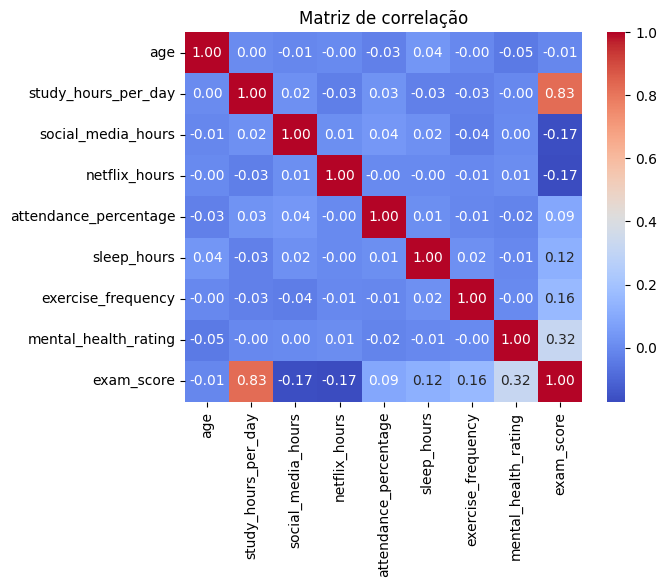

In [ ]:
sns.heatmap(df_student.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlação')
plt.show()

In [ ]:
from scipy.stats import pearsonr

# Coeficiente de correlação de Pearson e p-valor
corr_pearson, p_pearson = pearsonr(df_student.exam_score, df_student.age)

print(f'Pearson: r = {corr_pearson:.4f}, p-valor = {p_pearson:.4f}')

Pearson: r = -0.0089, p-valor = 0.7785


In [ ]:
# Coeficiente de correlação de Pearson e p-valor
corr_pearson, p_pearson = pearsonr(df_student.exam_score, df_student.attendance_percentage)

print(f'Pearson: r = {corr_pearson:.4f}, p-valor = {p_pearson:.4f}')

Pearson: r = 0.0898, p-valor = 0.0045


In [ ]:
#a idade não tem correlação com a nota, mas as demais variáveis numéricas tem

In [ ]:
import pandas as pd
from scipy import stats

# Função para realizar os testes e interpretar os resultados
def kruskal_analysis(df, categ, numeric):
    # Agrupar os dados por categoria
    grupos = [group[numeric].values for name, group in df.groupby(categ)]
    labels = df[categ].unique()

    print(f'Grupos: {labels}\n')

    # Teste de Kruskal-Wallis
    kruskal_stat, kruskal_p = stats.kruskal(*grupos)
    print(f'Teste de Kruskal-Wallis (diferença nas medianas):')
    print(f'  Estatística = {kruskal_stat:.4f}, p-valor = {kruskal_p:.4f}')

In [ ]:
#Correlação entre gender e exam_score
kruskal_analysis(df_student, 'diet_quality', 'mental_health_rating')

Grupos: ['Fair', 'Good', 'Poor']
Categories (3, object): ['Fair', 'Good', 'Poor']

Teste de Kruskal-Wallis (diferença nas medianas):
  Estatística = 5.2248, p-valor = 0.0734


In [ ]:
#Correlação entre gender e exam_score
kruskal_analysis(df_student, 'gender', 'exam_score')

Grupos: ['Female', 'Male', 'Other']
Categories (3, object): ['Female', 'Male', 'Other']

Teste de Kruskal-Wallis (diferença nas medianas):
  Estatística = 0.1501, p-valor = 0.9277


In [ ]:
#Correlação entre part_time_job e exam_score
kruskal_analysis(df_student, 'part_time_job', 'exam_score')

Grupos: ['No', 'Yes']
Categories (2, object): ['No', 'Yes']

Teste de Kruskal-Wallis (diferença nas medianas):
  Estatística = 0.9201, p-valor = 0.3374


In [ ]:
#Correlação entre diet_quality e exam_score
kruskal_analysis(df_student, 'diet_quality', 'exam_score')

Grupos: ['Fair', 'Good', 'Poor']
Categories (3, object): ['Fair', 'Good', 'Poor']

Teste de Kruskal-Wallis (diferença nas medianas):
  Estatística = 2.4602, p-valor = 0.2923


In [ ]:
#Correlação entre parental_education_level e exam_score
kruskal_analysis(df_student, 'parental_education_level', 'exam_score')

Grupos: ['Master', 'High School', 'Bachelor', NaN]
Categories (3, object): ['Bachelor', 'High School', 'Master']

Teste de Kruskal-Wallis (diferença nas medianas):
  Estatística = 2.9912, p-valor = 0.2241


In [ ]:
#Correlação entre internet_quality e exam_score
kruskal_analysis(df_student, 'internet_quality', 'exam_score')

Grupos: ['Average', 'Poor', 'Good']
Categories (3, object): ['Average', 'Good', 'Poor']

Teste de Kruskal-Wallis (diferença nas medianas):
  Estatística = 3.2213, p-valor = 0.1998


In [ ]:
#Correlação entre extracurricular_participation e exam_score
kruskal_analysis(df_student, 'extracurricular_participation', 'exam_score')

Grupos: ['Yes', 'No']
Categories (2, object): ['No', 'Yes']

Teste de Kruskal-Wallis (diferença nas medianas):
  Estatística = 0.0096, p-valor = 0.9219


In [ ]:
tabela = pd.DataFrame({
    'Gênero': [0.1501, 0.9277],
    'Trabalho de Meio Período': [0.9201, 0.3374],
    'Qualidade da Dieta': [2.4602, 0.2923],
    'Nível de Educação dos Pais': [2.9912, 0.2241],
    'Qualidade da Internet': [3.2213, 0.1998],
    'Participação Extracurricular': [0.0096, 0.9219]
})

In [ ]:
tabela

,Gênero,Trabalho de Meio Período,Qualidade da Dieta,Nível de Educação dos Pais,Qualidade da Internet,Participação Extracurricular
0,0.1501,0.9201,2.4602,2.9912,3.2213,0.0096
1,0.9277,0.3374,0.2923,0.2241,0.1998,0.9219


In [ ]:
#tabela.reindex(labels=[0, 1], ['Estatística', 'p-valor'])
tabela.set_axis(['Estatística', 'p-valor'], axis=0)

,Gênero,Trabalho de Meio Período,Qualidade da Dieta,Nível de Educação dos Pais,Qualidade da Internet,Participação Extracurricular
Estatística,0.1501,0.9201,2.4602,2.9912,3.2213,0.0096
p-valor,0.9277,0.3374,0.2923,0.2241,0.1998,0.9219


In [ ]:
df_student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   age                            1000 non-null   int64   
 1   gender                         1000 non-null   category
 2   study_hours_per_day            1000 non-null   float64 
 3   social_media_hours             1000 non-null   float64 
 4   netflix_hours                  1000 non-null   float64 
 5   part_time_job                  1000 non-null   category
 6   attendance_percentage          1000 non-null   float64 
 7   sleep_hours                    1000 non-null   float64 
 8   diet_quality                   1000 non-null   category
 9   exercise_frequency             1000 non-null   int64   
 10  parental_education_level       909 non-null    category
 11  internet_quality               1000 non-null   category
 12  mental_health_rating           1000

In [ ]:
df_student.isna().sum()

,0
age,0
gender,0
study_hours_per_day,0
social_media_hours,0
netflix_hours,0
part_time_job,0
attendance_percentage,0
sleep_hours,0
diet_quality,0
exercise_frequency,0


In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error
from scipy.stats import shapiro
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.stattools import durbin_watson

# ⚙️ Pré-processamento
# Remover linhas com dados faltantes (alternativa: imputar)
df_clean = df_student.dropna()

# 📌 Definir fórmula da regressão
# Variáveis categóricas serão automaticamente transformadas em dummies pelo patsy/statsmodels
formula = 'exam_score ~ age + study_hours_per_day + social_media_hours + netflix_hours + attendance_percentage + sleep_hours + exercise_frequency + mental_health_rating + C(gender) + C(part_time_job) + C(diet_quality) + C(parental_education_level) + C(internet_quality) + C(extracurricular_participation)'

# 📈 Ajustar o modelo
model = smf.ols(formula=formula, data=df_clean).fit()

# 📑 Resumo dos resultados
print(model.summary())

# 📊 Métricas de desempenho
y_true = df_clean['exam_score']
y_pred = model.fittedvalues

rmse = np.sqrt(mean_squared_error(y_true, y_pred))
print(f'RMSE: {rmse:.2f}')

# 📉 Teste de normalidade dos resíduos (Shapiro-Wilk)
shapiro_test = shapiro(model.resid)
print(f'Shapiro-Wilk p-valor: {shapiro_test.pvalue:.4f}')

# 📏 Teste de homocedasticidade (Breusch-Pagan)
bp_test = het_breuschpagan(model.resid, model.model.exog)
print(f'Breusch-Pagan p-valor: {bp_test[1]:.4f}')

# 📈 Teste de independência dos resíduos (Durbin-Watson)
dw = durbin_watson(model.resid)
print(f'Durbin-Watson: {dw:.2f}')


                            OLS Regression Results                            
Dep. Variable:             exam_score   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     448.9
Date:                Thu, 10 Jul 2025   Prob (F-statistic):               0.00
Time:                        00:22:38   Log-Likelihood:                -2810.9
No. Observations:                 909   AIC:                             5660.
Df Residuals:                     890   BIC:                             5751.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [ ]:
# 📌 Definir fórmula da regressão
# Variáveis categóricas serão automaticamente transformadas em dummies pelo patsy/statsmodels
formula = 'exam_score ~ study_hours_per_day + social_media_hours + netflix_hours + attendance_percentage + sleep_hours + exercise_frequency + mental_health_rating'

# 📈 Ajustar o modelo
model = smf.ols(formula=formula, data=df_clean).fit()

# 📑 Resumo dos resultados
print(model.summary())

# 📊 Métricas de desempenho
y_true = df_clean['exam_score']
y_pred = model.fittedvalues

rmse = np.sqrt(mean_squared_error(y_true, y_pred))
print(f'RMSE: {rmse:.2f}')

# 📉 Teste de normalidade dos resíduos (Shapiro-Wilk)
shapiro_test = shapiro(model.resid)
print(f'Shapiro-Wilk p-valor: {shapiro_test.pvalue:.4f}')

# 📏 Teste de homocedasticidade (Breusch-Pagan)
bp_test = het_breuschpagan(model.resid, model.model.exog)
print(f'Breusch-Pagan p-valor: {bp_test[1]:.4f}')

# 📈 Teste de independência dos resíduos (Durbin-Watson)
dw = durbin_watson(model.resid)
print(f'Durbin-Watson: {dw:.2f}')

                            OLS Regression Results                            
Dep. Variable:             exam_score   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     1156.
Date:                Thu, 10 Jul 2025   Prob (F-statistic):               0.00
Time:                        00:22:38   Log-Likelihood:                -2815.2
No. Observations:                 909   AIC:                             5646.
Df Residuals:                     901   BIC:                             5685.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 5.18

In [ ]:
import pandas as pd
import statsmodels.formula.api as smf

# ⚙️ Ajustar o modelo com a fórmula enxuta
formula = 'exam_score ~ study_hours_per_day + social_media_hours + netflix_hours + attendance_percentage + sleep_hours + exercise_frequency + mental_health_rating'

# Supondo que df_clean já tenha sido definido como no código anterior (sem valores ausentes)
model = smf.ols(formula=formula, data=df_clean).fit()

# 📥 Função para coletar valores e fazer previsão
def prever_nota():
    print("\nInsira os valores para as variáveis explicativas:")

    study_hours_per_day = float(input("Horas de estudo por dia: "))
    social_media_hours = float(input("Horas de redes sociais por dia: "))
    netflix_hours = float(input("Horas de Netflix por dia: "))
    attendance_percentage = float(input("Percentual de presença (%): "))
    sleep_hours = float(input("Horas de sono por dia: "))
    exercise_frequency = int(input("Frequência de exercício por semana (número de vezes): "))
    mental_health_rating = int(input("Nota de saúde mental (1 a 10): "))

    # 📊 Montar DataFrame com os valores inseridos
    dados_novos = pd.DataFrame({
        'study_hours_per_day': [study_hours_per_day],
        'social_media_hours': [social_media_hours],
        'netflix_hours': [netflix_hours],
        'attendance_percentage': [attendance_percentage],
        'sleep_hours': [sleep_hours],
        'exercise_frequency': [exercise_frequency],
        'mental_health_rating': [mental_health_rating]
    })

    # 📈 Fazer a previsão
    nota_prevista = model.predict(dados_novos)

    print(f"\n🔮 Predição da nota no exame: {nota_prevista.values[0]:.2f}")

# ✅ Chamar função
prever_nota()



Insira os valores para as variáveis explicativas:


KeyboardInterrupt: Interrupted by user